## Hierarchical_clustering

In [249]:
#Cargamos las librerias necesarias

import pandas as pd # Manejo y análisis de estructuras de datos
import numpy as np # Cálculo numérico y el análisis de datos
import seaborn as sns # Creación gráficos estadísticos
import matplotlib.pyplot as plt # Creación de gráficos en dos dimensiones
import plotly.graph_objs as go # Creación de gráficos en tres dimensiones
import plotly.express as px # Creación de gráficos en tres dimensiones


# librerías de para implementar modelo Kmeans
from sklearn.cluster import AgglomerativeClustering #algoritmos de agrupamiento o clustering, dividir datos en grupos o clusters basados en su similitud.
from sklearn.preprocessing import StandardScaler #escalar o normalizar los datos 
from scipy.cluster.hierarchy import linkage, dendrogram #herramientas para realizar agrupamiento jerárquico y visualización de dendrogramas.
#dendrogram:  genera un gráfico de árbol 

# librerías de para evaluar el modelo
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score
from datetime import datetime

#Librería para evitar la advertencia de que el modelo tiene una pérdida de memoria en Windows 
import warnings
warnings.filterwarnings('ignore')

### Análisis Expliratorio

In [251]:
# Cargamos el dataset y mostramos las 5 primeras lineas
data = pd.read_csv("Mall_Customers.csv")
data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


#### El dataset tiene 200 filas y 5 columnas

In [261]:
# Vemos la medida del array cargado 
data.shape

(200, 5)

In [263]:
# Vemos el resumen estadistico
data.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


#### No se encontraron datos nulos en el dataset

In [265]:
# Validamos si existen valores nulos
data.isna().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [267]:
# Vemos el tipo de datos y el total de valores en cada columna
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB
None


#### En esta visualización notamos que el customerID no tiene relevancia

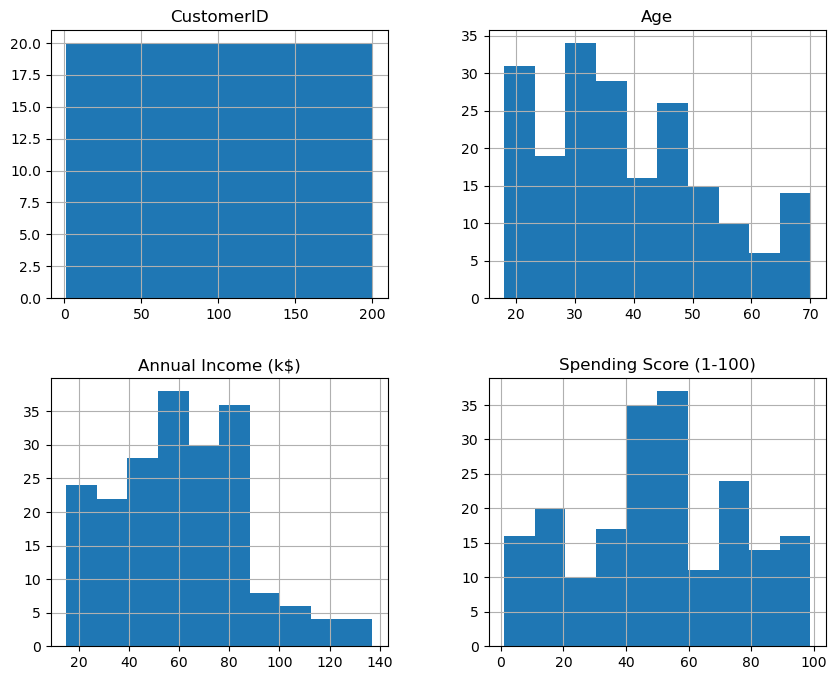

In [269]:
# Visualizamos la distribución de los datos de las variables númericas
data.hist(figsize=(10, 8))
plt.show()

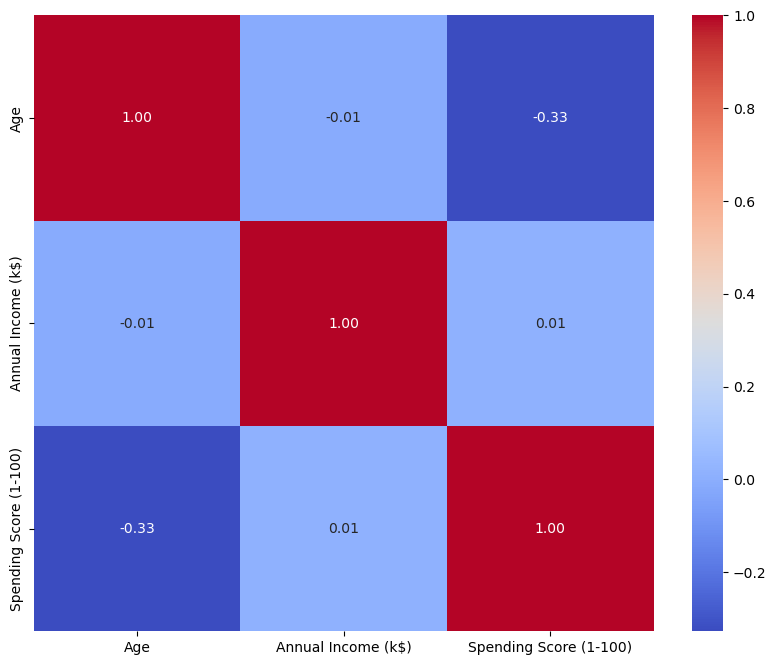

In [271]:
# Visualizamos un mapa de calor de la correlación
plt.figure(figsize=(10, 8))
sns.heatmap(data[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']].corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.show()

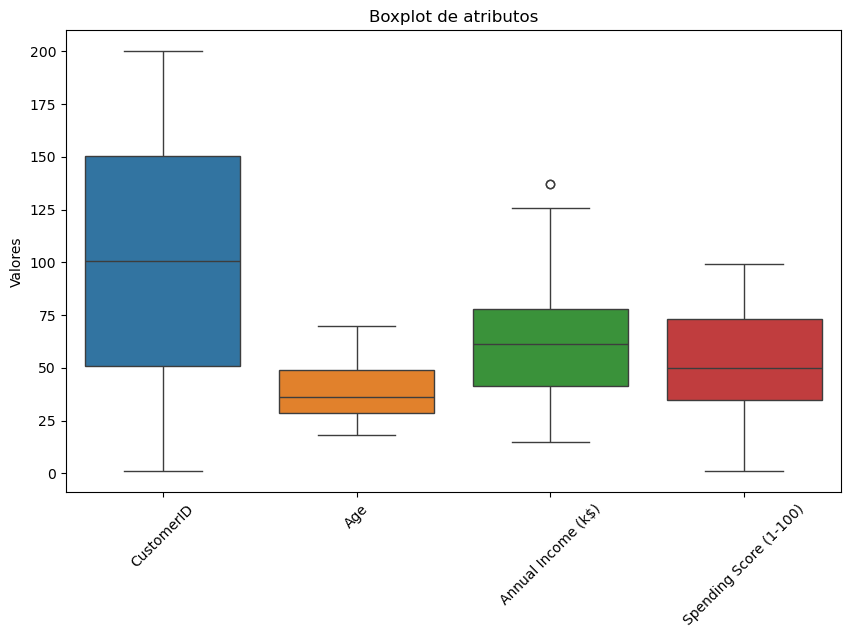

In [273]:
# Identificamos valores atípicos
plt.figure(figsize = (10,6))
sns.boxplot(data = data[['CustomerID','Age','Annual Income (k$)','Spending Score (1-100)']])
plt.xticks(rotation = 45)
plt.title('Boxplot de atributos')
plt.ylabel('Valores')
plt.show()

In [275]:
#Contamos antidad de Datos Atípicos
nivel_minimo=15
nivel_maximo=125
Total_Atipicos=((data['Annual Income (k$)']<nivel_minimo)|(data['Annual Income (k$)']>nivel_maximo)).sum()
print("El total de datos atípicos es {}".format(Total_Atipicos))

El total de datos atípicos es 4


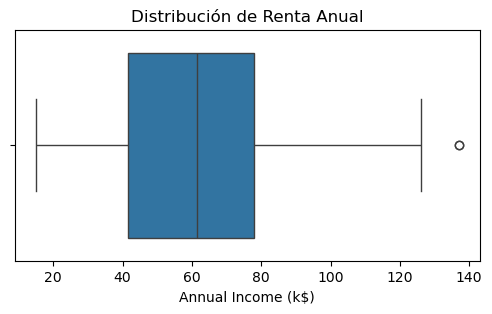

In [277]:
# Visualizamos valores atípicos
plt.figure(figsize=(6, 3))
sns.boxplot(x=data['Annual Income (k$)'])
plt.title('Distribución de Renta Anual')
plt.show()

In [281]:
# Calcular Q1 (primer cuartil) y Q3 (tercer cuartil)
Q1 = data['Annual Income (k$)'].quantile(0.25)
Q3 = data['Annual Income (k$)'].quantile(0.75)
IQR = Q3 - Q1  # Rango intercuartílico

In [283]:
# Definimos los límites superior e inferior
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

In [289]:
# Creamos un dataframe solo con los valores atípicos
outliers_Annual_Income = data[(data['Annual Income (k$)'] > upper_bound) | (data['Annual Income (k$)'] < lower_bound)]
print(outliers_Annual_Income)

     CustomerID Gender  Age  Annual Income (k$)  Spending Score (1-100)
198         199   Male   32                 137                      18
199         200   Male   30                 137                      83


In [291]:
# Filtramos columnas del modelo 
Datos1 = data[["Gender","Age","Annual Income (k$)","Spending Score (1-100)"]]

In [293]:
# Convertimos Gender a valores numéricos (Male = 0, Female = 1)
Datos1['Gender'] = Datos1['Gender'].map({'Male': 0, 'Female': 1})

In [295]:
# Vemos la medida del array cargado 
Datos1.shape

(200, 4)

In [297]:
# Vemos resumen estadistico
Datos1.describe()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,0.560000,38.850000,60.560000,50.200000
std,0.497633,13.969007,26.264721,25.823522
min,0.000000,18.000000,15.000000,1.000000
25%,0.000000,28.750000,41.500000,34.750000
50%,1.000000,36.000000,61.500000,50.000000
75%,1.000000,49.000000,78.000000,73.000000
max,1.000000,70.000000,137.000000,99.000000


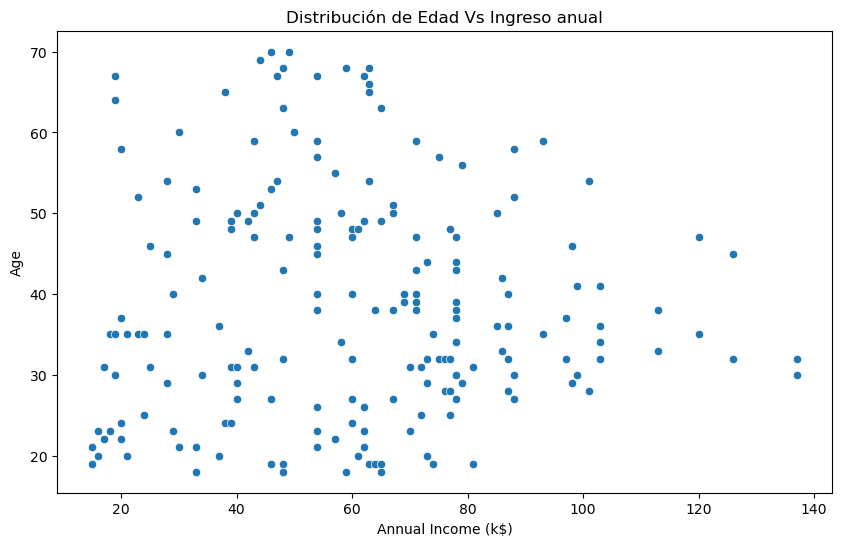

In [326]:
# Graficamos relaicones antes del agrupamiento
plt.figure(figsize=(10, 6))
sns.scatterplot(x=Datos1['Annual Income (k$)'], y=Datos1['Age'])
plt.title('Distribución de Edad Vs Ingreso anual')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Age')
plt.show()

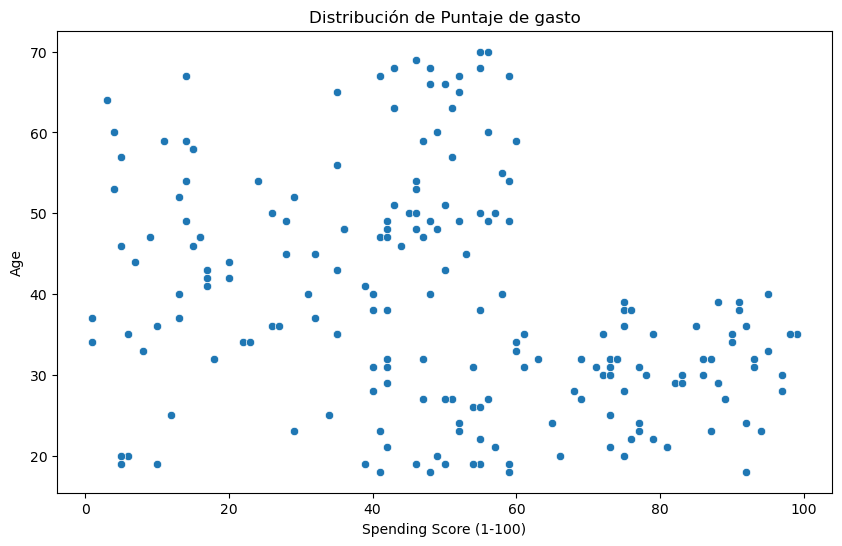

In [301]:
# Graficamos relaicones antes del agrupamiento
plt.figure(figsize=(10, 6))
sns.scatterplot(x=Datos1['Spending Score (1-100)'], y=Datos1['Age'])
plt.title('Distribución de Puntaje de gasto')
plt.xlabel('Spending Score (1-100)')
plt.ylabel('Age')
plt.show()

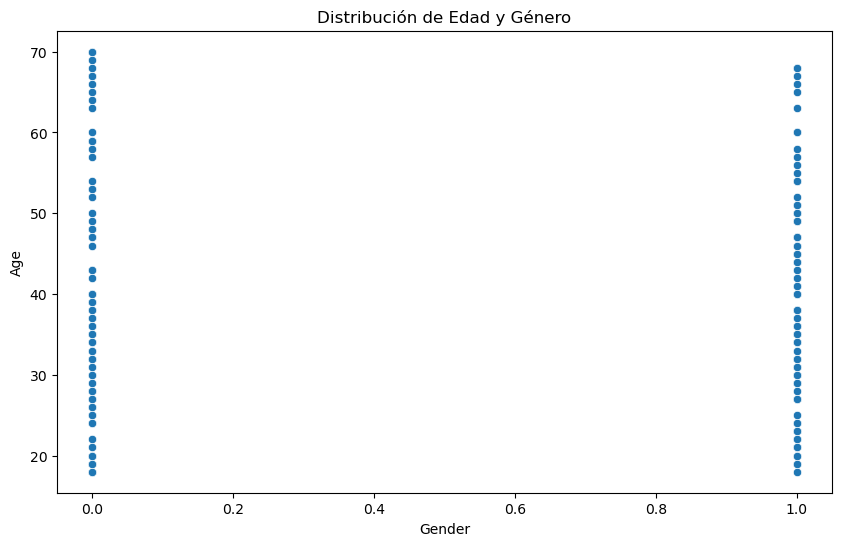

In [303]:
# Graficamos relaicones antes del agrupamiento
plt.figure(figsize=(10, 6))
sns.scatterplot(x=Datos1['Gender'], y=Datos1['Age'])
plt.title('Distribución de Edad y Género')
plt.xlabel('Gender')
plt.ylabel('Age')
plt.show()

In [305]:
# Standarizar los datos
scaler = StandardScaler()
scaled_data = scaler.fit_transform(Datos1[['Gender','Age','Annual Income (k$)','Spending Score (1-100)']])

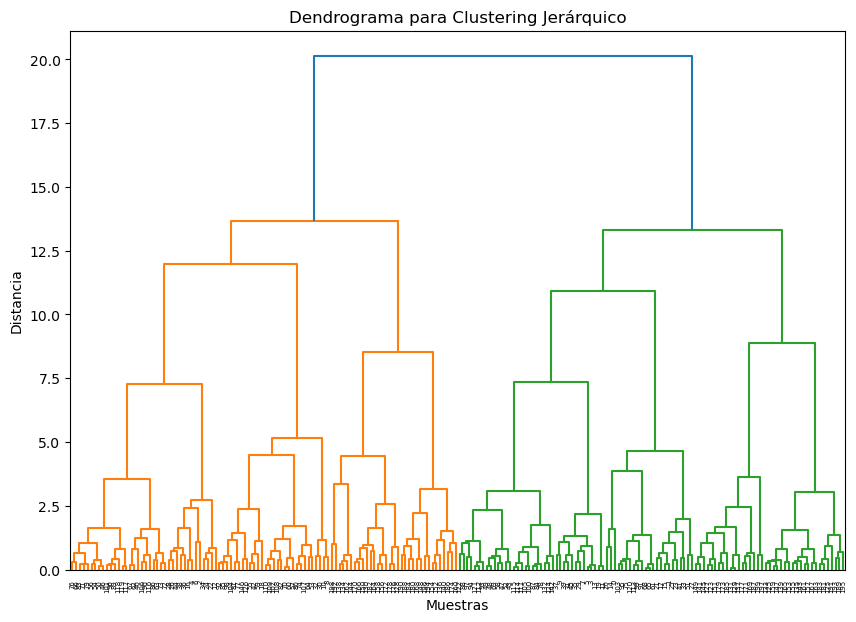

In [307]:
# Check for and handle non-finite values in scaled_data
scaled_data = np.nan_to_num(scaled_data)  # Reemplaza valores NaN, inf y -inf con valores finitos

# Continue with hierarchical clustering
linked = linkage(scaled_data, method='ward') # Realiza el enlace jerárquico con el método de Ward

plt.figure(figsize=(10, 7))
dendrogram(linked, orientation='top', distance_sort='descending', show_leaf_counts=False) # Dibuja el dendrograma
plt.title('Dendrograma para Clustering Jerárquico')
plt.xlabel('Muestras')
plt.ylabel('Distancia')
plt.show()

In [309]:
# Verificamos la longitud del DataFrame original
print(f"Longitud del DataFrame original: {len(data)}")

Longitud del DataFrame original: 200


In [311]:
# Verificamos la longitud del DataFrame preprocesado
print(f"Longitud del DataFrame preprocesado: {len(Datos1)}")

Longitud del DataFrame preprocesado: 200


In [342]:
# Aplicamos el algoritmo de agrupamiento jerárquico
# Elegimos 5 clusters, basados en el dendrograma
model = AgglomerativeClustering(n_clusters=5, linkage='ward')  
labels = model.fit_predict(scaled_data)

# Asignar los clusters al DataFrame original
data['Cluster'] =model.fit_predict(scaled_data)

# Mostrar el DataFrame con los clusters asignados
data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),model,Cluster
0,1,Male,19,15,39,0,0
1,2,Male,21,15,81,0,0
2,3,Female,20,16,6,3,3
3,4,Female,23,16,77,0,0
4,5,Female,31,17,40,3,3


In [315]:
# Evaluamos del modelo

# Coeficiente de Silhouette
sil_score = silhouette_score(scaled_data, labels)
print(f"Coeficiente de Silhouette: {sil_score}")

# Índice de Calinski-Harabasz
ch_score = calinski_harabasz_score(scaled_data, labels)
print(f"Índice de Calinski-Harabasz: {ch_score}")

# Índice de Davies-Bouldin
db_score = davies_bouldin_score(scaled_data, labels)
print(f"Índice de Davies-Bouldin: {db_score}")

Coeficiente de Silhouette: 0.28699413201651747
Índice de Calinski-Harabasz: 64.46870730105833
Índice de Davies-Bouldin: 1.2197730790225612


##### Coeficiente de Silhouette (0.287): Este valor es moderadamente positivo, lo que indica que los clústeres están razonablemente bien definidos, pero no de manera óptima. Aún hay margen de mejora.
##### Índice de Calinski-Harabasz (64.47): Este valor es bastante bueno, ya que indica que los clústeres están bien separados y con una adecuada relación entre la dispersión interna y externa.
##### Índice de Davies-Bouldin (1.22): Este valor es moderado. Aunque está por encima de 1, no es alarmante, pero indica que los clústeres podrían estar un poco más separados o ser más compactos.

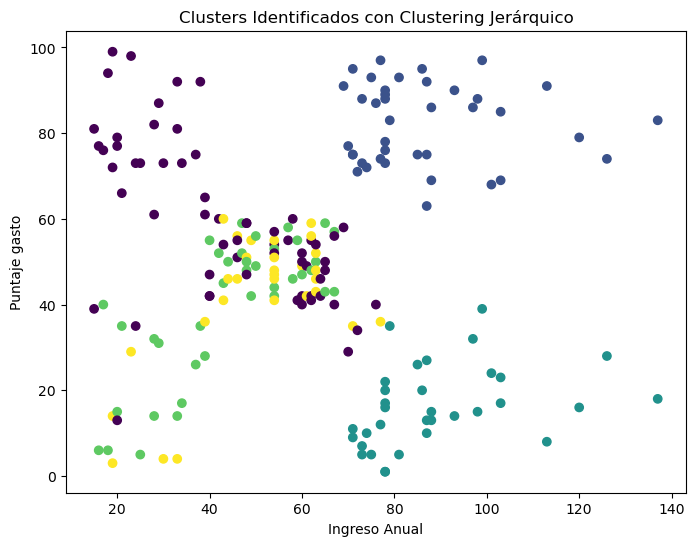

In [346]:
from sklearn.cluster import AgglomerativeClustering
import matplotlib.pyplot as plt

# Aplicamos el modelo de clustering jerárquico
model = AgglomerativeClustering(n_clusters=5)  # Ajustar el número de clusters
Datos1['Cluster'] = model.fit_predict(scaled_data)
# Graficamos los clusters
plt.figure(figsize=(8, 6))
plt.scatter(data['Annual Income (k$)'], data['Spending Score (1-100)'], c=data['Cluster'], cmap='viridis')
plt.title('Clusters Identificados con Clustering Jerárquico')
plt.xlabel('Ingreso Anual')
plt.ylabel('Puntaje gasto')
plt.show()

Silhouette Score: 0.28699413201651747


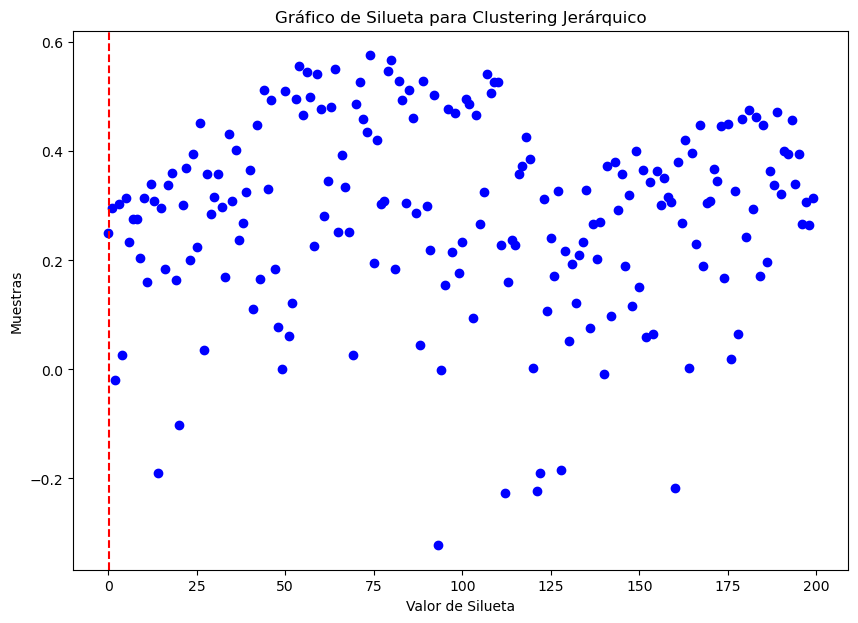

In [348]:
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.pyplot as plt

# Calculamos la silueta
silhouette_avg = silhouette_score(scaled_data, model.labels_)
print(f'Silhouette Score: {silhouette_avg}')

# Mostramos el gráfico de silueta
sample_silhouette_values = silhouette_samples(scaled_data, model.labels_)
fig, ax = plt.subplots(figsize=(10, 7))

ax.plot(sample_silhouette_values, 'bo')
ax.axvline(x=silhouette_avg, color="red", linestyle="--")
ax.set_title("Gráfico de Silueta para Clustering Jerárquico")
ax.set_xlabel("Valor de Silueta")
ax.set_ylabel("Muestras")
plt.show()